In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import math 

In [6]:
import sympy as sp

In [7]:
from sklearn.datasets import load_boston

In [37]:
from sklearn.linear_model import LinearRegression

In [40]:
from sklearn.model_selection import train_test_split

In [14]:
import seaborn as sns

In [8]:
boston_dataset = load_boston()

In [9]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### 取得相關資料:
    CRIM(犯罪率) / INDUS(每英畝非零售業比例) / RM(每棟住宅平均房間數) / DIS(與就業中心的加權距離) / RAD(到達逕向公路係數)
    安全 / 發展 / 房間數 / 地理位置 / 交通

In [15]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

In [16]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
boston.drop("ZN", axis=1, inplace=True)
boston.drop("CHAS", axis=1, inplace=True)
boston.drop("NOX", axis=1, inplace=True)
boston.drop("AGE", axis=1, inplace=True)
boston.drop("TAX", axis=1, inplace=True)
boston.drop("PTRATIO", axis=1, inplace=True)
boston.drop("B", axis=1, inplace=True)
boston.drop("LSTAT", axis=1, inplace=True)

In [35]:
boston[:7]

,CRIM,INDUS,RM,DIS,RAD,MEDV
0,0.00632,2.31,6.575,4.0900,1.0,24.0
1,0.02731,7.07,6.421,4.9671,2.0,21.6
2,0.02729,7.07,7.185,4.9671,2.0,34.7
3,0.03237,2.18,6.998,6.0622,3.0,33.4
4,0.06905,2.18,7.147,6.0622,3.0,36.2
5,0.02985,2.18,6.430,6.0622,3.0,28.7
6,0.08829,7.87,6.012,5.5605,5.0,22.9


In [39]:
x = boston.loc[:, "CRIM":"RAD"].values
y = boston.MEDV.values

model = LinearRegression()

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [42]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_predict = model.predict(x_test)

In [51]:
correlation_matrix = boston.corr().round(3)

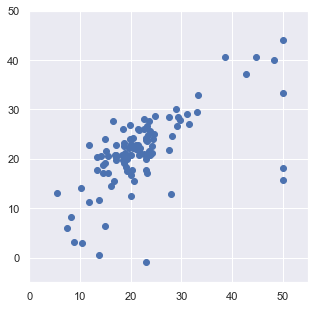

In [58]:
sns.set()

plt.scatter(y_test, y_predict)
plt.xlim(0, 55)
plt.ylim(-5, 50)

plt.show()

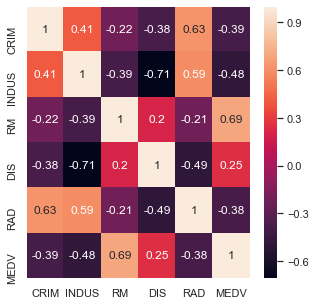

In [56]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(correlation_matrix, annot=True)

### 資料分析四部曲
    1.處理資料
        x = pd.DataFrame(Data, columns= )
        a = x.loc[].values
        b = y.希望比對的資料.values
        x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=0)
    2.建立函數機
        from sklearn.liner_model import LinearRegression
        model = LinearRegression
    3.學習
        model.fit(x_train, y_train)
    4.預測
        y_predict = model.predict(x_test)
    5.顯示
        p